# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#import dependencies
import requests
import json
import citipy
import pandas as pd
import matplotlib.pyplot as plt
import random
from citipy import citipy
from pprint import pprint
from config import weather_api_key

In [2]:
#state number of samples and create list of cities
samples = 2000
cities = []

#iterate through sample size, and obtain city name from random latitude and longitude
for numbers in range(0,samples):
    latitude = round(random.uniform(-90, 90),2)
    longitude = round(random.uniform(-180,180),2)
    city = citipy.nearest_city(latitude, longitude)
    if city.city_name not in cities:
        cities.append(city.city_name)

## Generate Cities List

In [3]:
#check number of cities obtained
len(cities)

745

In [4]:
#remove duplicate cities and create dataframe
cities_df = pd.DataFrame(cities, index = range(0,len(cities)))
cities_df = cities_df.rename(columns={0:"City"})
cities_df["Country"] = " "
cities_df["Datetime"] = " "
cities_df["Latitude"] = " "
cities_df["Longitude"] = " "
cities_df["Max temperature (c)"] = " "
cities_df["Humidity (%)"] = " "
cities_df["Cloudiness (%)"] = " "
cities_df["Wind Speed (mps)"] = " "
cities_df

,City,Country,Datetime,Latitude,Longitude,Max temperature (c),Humidity (%),Cloudiness (%),Wind Speed (mps)
0,new norfolk,,,,,,,,
1,taolanaro,,,,,,,,
2,bilma,,,,,,,,
3,mount isa,,,,,,,,
4,batemans bay,,,,,,,,
...,...,...,...,...,...,...,...,...,...
740,axim,,,,,,,,
741,ternate,,,,,,,,
742,dharchula,,,,,,,,
743,zhezkazgan,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#iterate through cities and obtain data, and fill data in dataframe

for index, row in cities_df.iterrows():
    try:
        url = "http://api.openweathermap.org/data/2.5/weather?"
        parameters = {
            "units": "metric",
            "appid": {weather_api_key},
            "q":{row[0]}
        }
        weather_data = requests.get(url, params = parameters).json()
        print(f"Processing record {index}. City number: {weather_data['id']}. City name: {weather_data['name']}")
        country = weather_data["sys"]["country"]
        datetime = weather_data["dt"]
        lat = weather_data["coord"]["lat"]
        lon = weather_data["coord"]["lon"]
        tempc = weather_data["main"]["temp_max"]
        humid = weather_data["main"]["humidity"]
        cloud = weather_data["clouds"]["all"]
        wind = weather_data["wind"]["speed"]
        cities_df.loc[index,"Country"] = country
        cities_df.loc[index,"Datetime"] = datetime
        cities_df.loc[index,"Latitude"] = lat
        cities_df.loc[index,"Longitude"] = lon
        cities_df.loc[index,"Max temperature (c)"] = tempc
        cities_df.loc[index,"Humidity (%)"] = humid
        cities_df.loc[index,"Cloudiness (%)"] = cloud
        cities_df.loc[index,"Wind Speed (mps)"] = wind
    except KeyError:
        print(f"No data could be obtained for city: {row[0]}")
        

Processing record 0. City number: 2155415. City name: New Norfolk
No data could be obtained for city: taolanaro
Processing record 2. City number: 2446796. City name: Bilma
Processing record 3. City number: 2065594. City name: Mount Isa
Processing record 4. City number: 2176639. City name: Batemans Bay
Processing record 5. City number: 4345850. City name: West Monroe
Processing record 6. City number: 3919720. City name: Colquechaca
Processing record 7. City number: 1651810. City name: Airai
Processing record 8. City number: 4030556. City name: Rikitea
Processing record 9. City number: 3874787. City name: Punta Arenas
Processing record 10. City number: 6201424. City name: Mataura
Processing record 11. City number: 1735106. City name: George Town
Processing record 12. City number: 964420. City name: Port Elizabeth
Processing record 13. City number: 3127047. City name: Calatayud
Processing record 14. City number: 4020109. City name: Atuona
Processing record 15. City number: 3461444. City n

Processing record 132. City number: 1252958. City name: Wānkāner
Processing record 133. City number: 1168700. City name: Ormara
Processing record 134. City number: 1513491. City name: Yangi Marg`ilon
Processing record 135. City number: 2191562. City name: Dunedin
Processing record 136. City number: 2094027. City name: Kieta
Processing record 137. City number: 2171099. City name: Codrington
Processing record 138. City number: 2655315. City name: Blyth
No data could be obtained for city: sentyabrskiy
Processing record 140. City number: 2396853. City name: Omboué
Processing record 141. City number: 5051902. City name: Waseca
Processing record 142. City number: 2138555. City name: Poum
Processing record 143. City number: 6170031. City name: Tuktoyaktuk
No data could be obtained for city: belushya guba
Processing record 145. City number: 1789289. City name: Ximeicun
Processing record 146. City number: 3883167. City name: Linares
Processing record 147. City number: 2194098. City name: Ahipar

Processing record 262. City number: 777019. City name: Vardø
Processing record 263. City number: 3356832. City name: Henties Bay
No data could be obtained for city: borama
Processing record 265. City number: 2120591. City name: Tilichiki
Processing record 266. City number: 3393838. City name: Nova Olinda do Norte
Processing record 267. City number: 5396987. City name: Solano
No data could be obtained for city: attawapiskat
Processing record 269. City number: 5924351. City name: Clyde River
Processing record 270. City number: 3175096. City name: Laas
Processing record 271. City number: 2063039. City name: Port Keats
Processing record 272. City number: 1174220. City name: Khanewal
Processing record 273. City number: 5955902. City name: Fort Nelson
No data could be obtained for city: mahaicony
Processing record 275. City number: 3374083. City name: Bathsheba
Processing record 276. City number: 5019335. City name: Brooklyn Park
Processing record 277. City number: 1002145. City name: George

Processing record 391. City number: 2032614. City name: Baruun-Urt
Processing record 392. City number: 3461289. City name: Indiaroba
Processing record 393. City number: 3355672. City name: Lüderitz
Processing record 394. City number: 1308204. City name: Myanaung
Processing record 395. City number: 6171633. City name: Ucluelet
Processing record 396. City number: 3141667. City name: Roald
Processing record 397. City number: 1816705. City name: Beihai
Processing record 398. City number: 161616. City name: Balkanabat
Processing record 399. City number: 1804153. City name: Leshan
Processing record 400. City number: 2020838. City name: Lensk
Processing record 401. City number: 186180. City name: Moyale
Processing record 402. City number: 780687. City name: Berlevåg
Processing record 403. City number: 2025241. City name: Churapcha
Processing record 404. City number: 2639144. City name: Rosehearty
Processing record 405. City number: 293842. City name: Kiryat Gat
Processing record 406. City num

Processing record 520. City number: 6067747. City name: Matagami
Processing record 521. City number: 1264976. City name: Leh
Processing record 522. City number: 1798537. City name: Hanyang
Processing record 523. City number: 328709. City name: Shambu
Processing record 524. City number: 2134814. City name: Sola
Processing record 525. City number: 5467328. City name: Farmington
Processing record 526. City number: 2294915. City name: Takoradze
No data could be obtained for city: a
Processing record 528. City number: 4255151. City name: Bud
Processing record 529. City number: 3837213. City name: San Juan
Processing record 530. City number: 3122172. City name: Foz
Processing record 531. City number: 3516376. City name: Tamiahua
Processing record 532. City number: 1706466. City name: Ligayan
Processing record 533. City number: 2684653. City name: Oxelösund
Processing record 534. City number: 1528998. City name: Yumen
Processing record 535. City number: 5554072. City name: Juneau
Processing r

Processing record 649. City number: 3520994. City name: Puerto Escondido
Processing record 650. City number: 3407248. City name: Araripe
Processing record 651. City number: 3379316. City name: Lethem
Processing record 652. City number: 3175788. City name: Oga
Processing record 653. City number: 5881688. City name: Fort Saint James
Processing record 654. City number: 779622. City name: Havøysund
Processing record 655. City number: 336526. City name: Gīdolē
Processing record 656. City number: 1274077. City name: Chītāpur
Processing record 657. City number: 1858041. City name: Kushikino
Processing record 658. City number: 3062658. City name: Vnorovy
Processing record 659. City number: 498956. City name: Samoylovka
Processing record 660. City number: 1808857. City name: Hanzhong
Processing record 661. City number: 1512019. City name: Aksarka
Processing record 662. City number: 3464343. City name: Eldorado
Processing record 663. City number: 6145890. City name: Shelburne
Processing record 6

In [6]:
#Remove blank rows
clean_data = cities_df.copy()
clean_data = clean_data.loc[clean_data["Country"] != " "].reset_index(drop = True)
clean_data

,City,Country,Datetime,Latitude,Longitude,Max temperature (c),Humidity (%),Cloudiness (%),Wind Speed (mps)
0,new norfolk,AU,1635152870,-42.7826,147.0587,10.51,70,70,1.34
1,bilma,NE,1635152871,18.6853,12.9164,33.02,12,5,4.28
2,mount isa,AU,1635152581,-20.7333,139.5,29.87,30,40,3.09
3,batemans bay,AU,1635152872,-35.7167,150.1833,15.05,65,35,3.45
4,west monroe,US,1635152873,32.5185,-92.1476,20.4,95,1,1.54
...,...,...,...,...,...,...,...,...,...
685,axim,GH,1635153540,4.8699,-2.2405,27.71,76,75,3.53
686,ternate,ID,1635153443,0.8,127.4,28.71,72,59,1.73
687,dharchula,IN,1635153542,29.85,80.5333,22.13,43,0,2.6
688,zhezkazgan,KZ,1635153542,47.8043,67.7144,13.43,30,100,4.13


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
clean_data.to_csv("cities.csv", header = True)

In [8]:
city_df = pd.read_csv("cities.csv", index_col=[0])
city_df

,City,Country,Datetime,Latitude,Longitude,Max temperature (c),Humidity (%),Cloudiness (%),Wind Speed (mps)
0,new norfolk,AU,1635152870,-42.7826,147.0587,10.51,70,70,1.34
1,bilma,NE,1635152871,18.6853,12.9164,33.02,12,5,4.28
2,mount isa,AU,1635152581,-20.7333,139.5000,29.87,30,40,3.09
3,batemans bay,AU,1635152872,-35.7167,150.1833,15.05,65,35,3.45
4,west monroe,US,1635152873,32.5185,-92.1476,20.40,95,1,1.54
...,...,...,...,...,...,...,...,...,...
685,axim,GH,1635153540,4.8699,-2.2405,27.71,76,75,3.53
686,ternate,ID,1635153443,0.8000,127.4000,28.71,72,59,1.73
687,dharchula,IN,1635153542,29.8500,80.5333,22.13,43,0,2.60
688,zhezkazgan,KZ,1635153542,47.8043,67.7144,13.43,30,100,4.13


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
city_df.loc[city_df["Humidity (%)"] > 100]

,City,Country,Datetime,Latitude,Longitude,Max temperature (c),Humidity (%),Cloudiness (%),Wind Speed (mps)


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#step not applicable as there are no cities with humidity above 100%.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

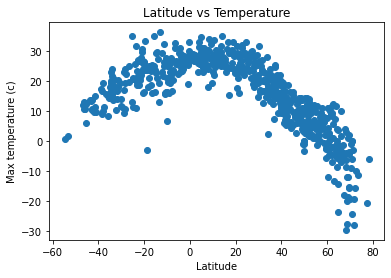

In [11]:
plt.scatter(city_df["Latitude"], city_df["Max temperature (c)"])
plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max temperature (c)")
plt.savefig("latitude_vs_temperature.png")
plt.show()

## Latitude vs. Humidity Plot

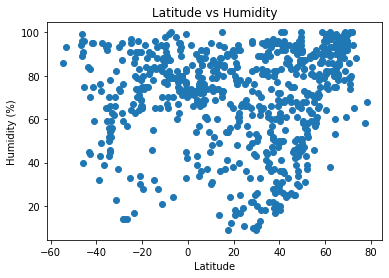

In [12]:
plt.scatter(city_df["Latitude"], city_df["Humidity (%)"])
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("latitude_vs_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

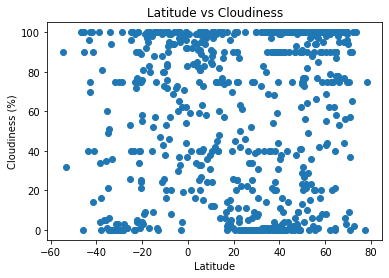

In [13]:
plt.scatter(city_df["Latitude"], city_df["Cloudiness (%)"])
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("lat_vs_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

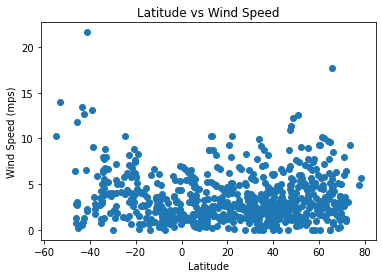

In [14]:
plt.scatter(city_df["Latitude"], city_df["Wind Speed (mps)"])
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mps)")
plt.savefig("lat_vs_windspeed.png")
plt.show()

## Linear Regression

In [15]:
from scipy.stats import linregress
northern_hemisphere = city_df.loc[city_df["Latitude"]>=0]
southern_hemisphere = city_df.loc[city_df["Latitude"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

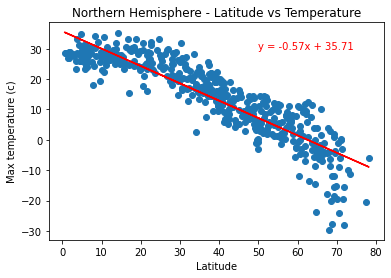

In [16]:
plt.scatter(northern_hemisphere["Latitude"], northern_hemisphere["Max temperature (c)"])
plt.title("Northern Hemisphere - Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max temperature (c)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Latitude"], northern_hemisphere["Max temperature (c)"])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = northern_hemisphere["Latitude"] * slope + intercept
plt.annotate(line_eq, (50,30), color = "red")
plt.plot(northern_hemisphere["Latitude"], regress_values, "r-")
plt.savefig("north_latitude_vs_temperature.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

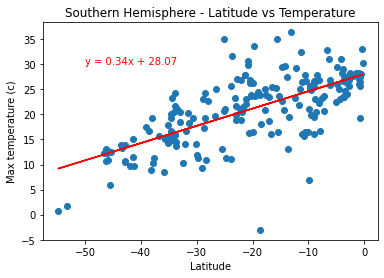

In [17]:
plt.scatter(southern_hemisphere["Latitude"], southern_hemisphere["Max temperature (c)"])
plt.title("Southern Hemisphere - Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max temperature (c)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Latitude"], southern_hemisphere["Max temperature (c)"])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = southern_hemisphere["Latitude"] * slope + intercept
plt.annotate(line_eq, (-50,30), color = "red")
plt.plot(southern_hemisphere["Latitude"], regress_values, "r-")
plt.savefig("south_latitude_vs_temperature.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

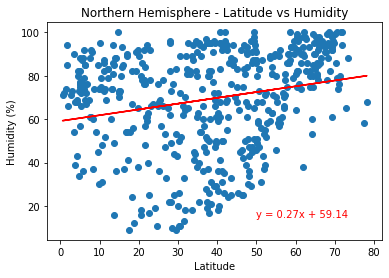

In [18]:
plt.scatter(northern_hemisphere["Latitude"], northern_hemisphere["Humidity (%)"])
plt.title("Northern Hemisphere - Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Latitude"], northern_hemisphere["Humidity (%)"])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = northern_hemisphere["Latitude"] * slope + intercept
plt.annotate(line_eq, (50,15), color = "red")
plt.plot(northern_hemisphere["Latitude"], regress_values, "r-")
plt.savefig("north_latitude_vs_humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

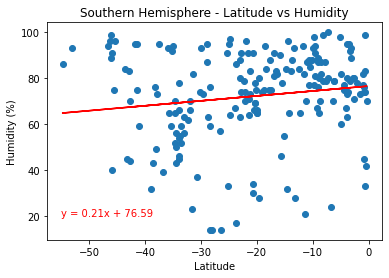

In [19]:
plt.scatter(southern_hemisphere["Latitude"], southern_hemisphere["Humidity (%)"])
plt.title("Southern Hemisphere - Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Latitude"], southern_hemisphere["Humidity (%)"])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = southern_hemisphere["Latitude"] * slope + intercept
plt.annotate(line_eq, (-55,20), color = "red")
plt.plot(southern_hemisphere["Latitude"], regress_values, "r-")
plt.savefig("south_latitude_vs_humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

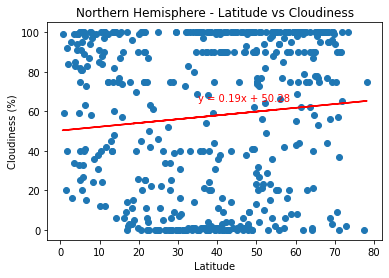

In [20]:
plt.scatter(northern_hemisphere["Latitude"], northern_hemisphere["Cloudiness (%)"])
plt.title("Northern Hemisphere - Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Latitude"], northern_hemisphere["Cloudiness (%)"])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = northern_hemisphere["Latitude"] * slope + intercept
plt.annotate(line_eq, (35, 65), color = "red")
plt.plot(northern_hemisphere["Latitude"], regress_values, "r-")
plt.savefig("north_latitude_vs_cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

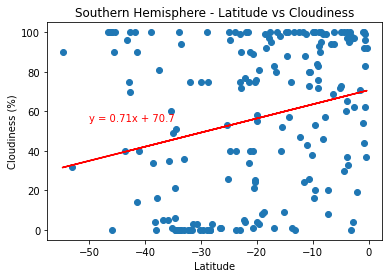

In [24]:
plt.scatter(southern_hemisphere["Latitude"], southern_hemisphere["Cloudiness (%)"])
plt.title("Southern Hemisphere - Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Latitude"], southern_hemisphere["Cloudiness (%)"])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = southern_hemisphere["Latitude"] * slope + intercept
plt.annotate(line_eq, (-50, 55), color = "red")
plt.plot(southern_hemisphere["Latitude"], regress_values, "r-")
plt.savefig("south_latitude_vs_cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

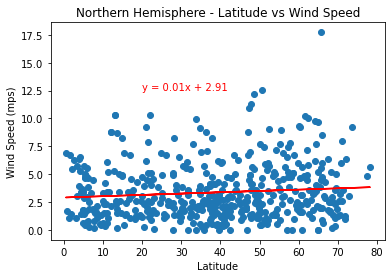

In [25]:
plt.scatter(northern_hemisphere["Latitude"], northern_hemisphere["Wind Speed (mps)"])
plt.title("Northern Hemisphere - Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mps)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Latitude"], northern_hemisphere["Wind Speed (mps)"])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = northern_hemisphere["Latitude"] * slope + intercept
plt.annotate(line_eq, (20,12.5), color = "red")
plt.plot(northern_hemisphere["Latitude"], regress_values, "r-")
plt.savefig("north_latitude_vs_windspeed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

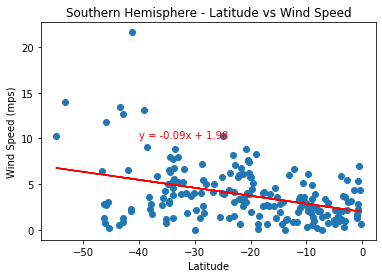

In [26]:
plt.scatter(southern_hemisphere["Latitude"], southern_hemisphere["Wind Speed (mps)"])
plt.title("Southern Hemisphere - Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mps)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Latitude"], southern_hemisphere["Wind Speed (mps)"])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = southern_hemisphere["Latitude"] * slope + intercept
plt.annotate(line_eq, (-40, 10), color = "red")
plt.plot(southern_hemisphere["Latitude"], regress_values, "r-")
plt.savefig("south_latitude_vs_windspeed.png")
plt.show()

# Observable trends
1. There is a strong correlation between latitude and temperature; the closer to latitude 0 you are, the higher the temperature. This is consistent with our understanding that the equator is closer to the sun, and therefore more hot.
2. There is no correlation between latitude and humidity. This is because humidity is more dependent on climate. 
3. There is no correlation between latitude and cloudiness. This is because cloudiness is more dependent on the season.